In [1]:
import numpy as np
from matplotlib.image import NonUniformImage
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
import os
import ptc_track.particles_trajectory_generator as ptg
import importlib as il
import data.bunch_configuration as buc
import ptc_track.madx_configuration as mc
il.reload(ptg)
sns.set(style="whitegrid")
home = "/eos/user/r/rmucha/SWAN_projects"
name_of_folder_with_configuration = "2017_matched"
name_of_xml_file = "configuration_reco_beam1.xml"
path_to_configuration = os.path.join(home, name_of_folder_with_configuration)
path_to_xml_file = os.path.join(home, name_of_folder_with_configuration, name_of_xml_file)
item_number = 0
madx_configuration = mc.TrackConfiguration(path_to_xml_file, item_number, path_to_configuration)

In [2]:
# Parameters of bunch
x_mean = 0.0
sigma_x = 0
theta_x_mean = 1.5e-4
sigma_theta_x = 0
y_mean = -1.5e-3
sigma_y = 0
theta_y_mean = 0.00
sigma_theta_y = 0
pt_mean = -0.15
sigma_pt = 0.2

particles_number = 1000

In [3]:
bunch_configuration = buc.BunchConfiguration.from_sigma(x_mean, sigma_x, particles_number,
                                                        theta_x_mean, sigma_theta_x, 1,
                                                        y_mean, sigma_y, 1,
                                                        theta_y_mean, sigma_theta_y, 1,
                                                        pt_mean, sigma_pt, 1)

In [4]:
output = ptg.generate_random_particles(madx_configuration, bunch_configuration, particles_number)

In [5]:
output.keys()

dict_keys(['end', 'MQXB.B2R5', 'STATION_220_H_2', 'start'])

In [6]:
# Names of segments, like MQXA.3R5
start_segment_name = "start"
end_segment_name = "end"

if start_segment_name != "start":
    output[start_segment_name].T[1] -= 1

In [7]:
output_matrix = output[end_segment_name]
indexes = output_matrix.T[0].astype(int) - 1
input_matrix = output[start_segment_name][indexes]

In [8]:
index_map = {
    "x": 2,
    "theta x": 3,
    "y": 4,
    "theta y": 5,
    "t": 6,
    "pt": 7,
    "s": 8,
    "e": 9,
    "alfa x": 10,
    "alfa y": 11
}
meters = " [m]"
radians = " [rad]"
seconds = " [s]"
energy = " [TeV]"
no_unit = " "
unit_map = {
    "x": meters,
    "theta x": radians,
    "y": meters,
    "theta y": radians,
    "t": seconds,
    "pt": no_unit,
    "s": meters,
    "e": energy,
    "alfa x": radians,
    "alfa y": radians
}


def plot_histogram(x_name, y_name, x_name_prefix, y_name_prefix, x_matrix, y_matrix, plot_axes, plot_x_pos, plot_y_pos):
    
    title = "Histogram " + x_name_prefix + x_name + " and " + y_name_prefix + y_name + " parameter"
    
    # Get vectors and their properties
    
    x_index = index_map[x_name]
    y_index = index_map[y_name]
    
    vector_x = pd.Series(x_matrix.T[x_index], name=x_name_prefix + x_name)
    vector_y = pd.Series(y_matrix.T[y_index], name=y_name_prefix + y_name)
    
    bins_number = 50
    
    sns.distplot(vector_x, bins=bins_number, ax=axes[plot_x_pos][plot_y_pos], color='y').set_title(title)
    sns.distplot(vector_y, bins=bins_number, ax=axes[plot_x_pos][plot_y_pos], color='b').set_title(title)

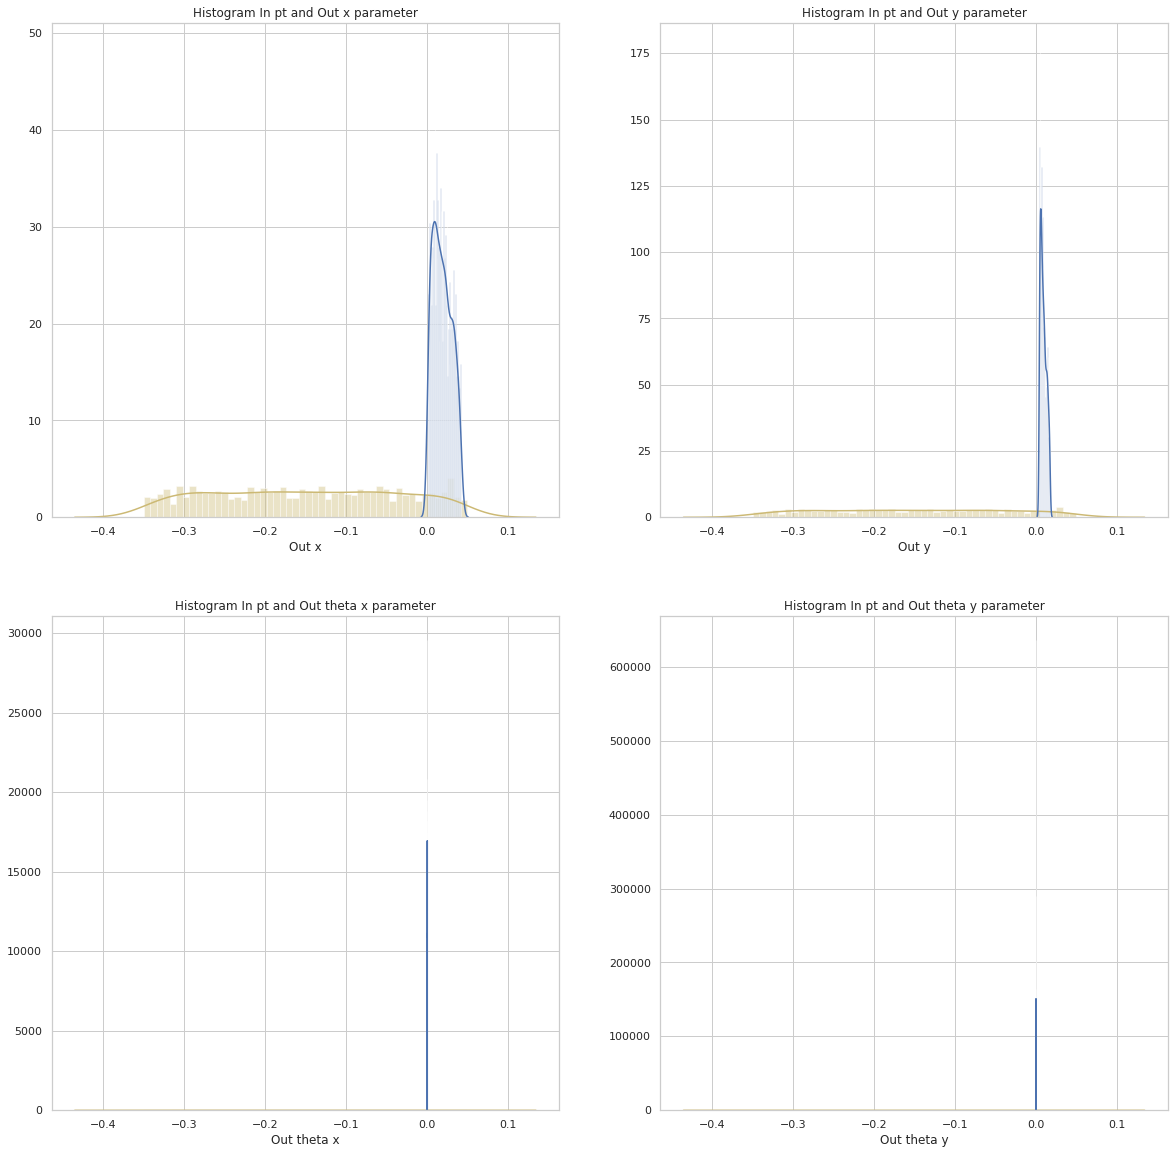

In [9]:
f, axes = plt.subplots(2, 2)

fig = plt.gcf()
fig.set_size_inches(20,20)

plot_histogram("pt", "x", "In ", "Out ", input_matrix, output_matrix, axes, 0, 0)

plot_histogram("pt", "y", "In ", "Out ", input_matrix, output_matrix, axes, 0, 1)

plot_histogram("pt", "theta x", "In ", "Out ", input_matrix, output_matrix, axes, 1, 0)

plot_histogram("pt", "theta y", "In ", "Out ", input_matrix, output_matrix, axes, 1, 1)
